# ¡Hola José! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡José excelente trabajo completando este proyecto! Has demostrado habilidades destacables en análisis exploratorio y visualización efectiva de datos. Además, tu capacidad para formular y verificar hipótesis estadísticas fue sólida y precisa, mostrando un fuerte dominio en el análisis crítico necesario para la toma de decisiones estratégicas. En general, desarrollaste un muy buen análisis en este caso de estudio, sigue manteniendo esta combinación de habilidades técnicas, analíticas y estratégicas en tus futuros proyectos.

¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

----

## Abrimos el archivo de datos y estudiamos la información general.

In [1]:
# Importamos librerías necesarias para el análisis

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
# Cargamos el dataset y lo almacenamos con DataFrame (DF)
df_games = pd.read_csv("datasets/games.csv")

In [3]:
# Imprimimos la información resumida del DF
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Se tiene un DataFrame con 16715 registros, de los cuales se tiene las siguientes observaciones:
- Los nombres de las columnas poseen mayúsculas en sus nombres
- La mitad de las columnas poseen datos ausentes, excepto las siguientes: `platform`, `na_sales`, `eu_sales`, `jp_sales`, `other_sales`.
- La columna `year_of_release` podemos convertirla a 'int', dado que no existen años no enteros.
- La columna `user_score` podemos convertirla a 'float', dado que es una puntuación (puede darse el caso que incluya decimales y se pueda trabajar en alguna operación o análisis más adelante).

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente la función `info`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

También te recomiendo usar la función `head`, para complementar la revisión inicial de los datos con los que vasa trabajar.  

</div>

## Preparamos los datos.

### Reemplazamos los nombres de las columnas (convertimos en minúsculas).

In [5]:
# Creamos una función que ralice el trabajo:
def convert_to_lowercase(df):
    new_col_names = []
    for old_name in df.columns:
        new_name = old_name.strip().lower().replace(' ', '_')
        new_col_names.append(new_name)
    return new_col_names

# Reemplazamos el nombre de las columnas antiguas por las nuevas
df_games.columns = convert_to_lowercase(df_games)

In [6]:
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo, es una excelente práctica convertir los nombres de las columnas a minúsculas para facilitar el trabajo posterior y evitar errores por tener una combinación de mayúsculas y minúsculas.

</div>

### Conviertimos los datos en los tipos necesarios.

##### Columna `year_of_release` (Año de lanzamiento)

Como existen datos ausentes en la columna `year_of_release`, vamos a evaluar si reemplazamos los datos ausentes por la media o mediana antes de convertir la columna a tipo `int`.

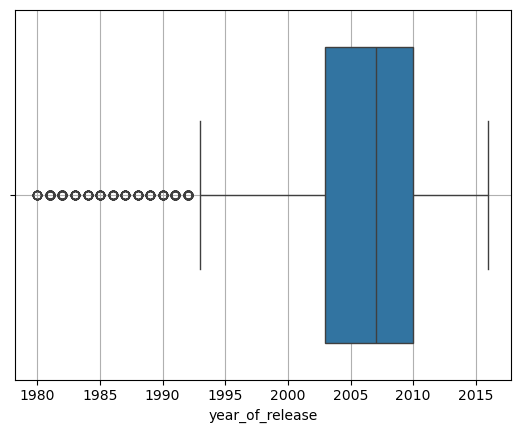

In [7]:
# Visualizamos si existen valores atípicos para elegir la media o mediana
sns.boxplot(data = df_games, x = df_games['year_of_release'])
plt.grid(True)

Como existen valores atípicos, vamos a elegir la 'mediana' para reemplazar los valores ausentes en la columna `year_of_release`

In [8]:
# Encontramos la mediana
year_of_release_median = df_games['year_of_release'].median()

In [9]:
# Reemplazamos por 0 los valores ausentes
df_games['year_of_release'] = df_games['year_of_release'].fillna(year_of_release_median)


In [10]:
# Convertimos a int los datos de la columna 'year_of_release'
df_games['year_of_release'] = df_games['year_of_release'].astype('int')

##### Columna `user_score`

Como existe datos ausentes en la columna `user_score`, vamos a evaluar si reemplazamos los datos ausentes por la media o mediana antes de convertir la columna a `float`

In [11]:
# Revisamos primero si existen datos con valor cero o TBD en la columna
df_games.query("user_score == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2007,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [12]:
# Convertimos la columna a float de forma segura
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors = 'coerce')

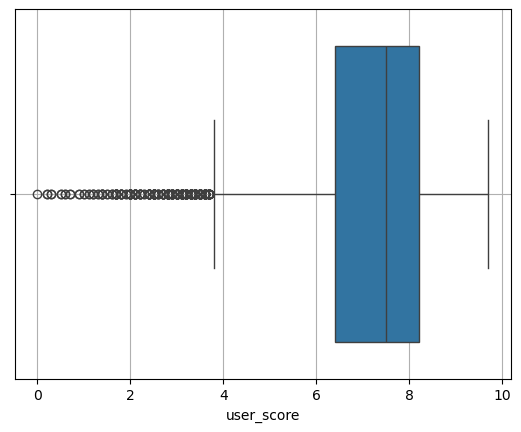

In [13]:
# Visualizamos si existen valores atípicos para elegir la media o mediana
sns.boxplot(data = df_games, x = df_games['user_score'])
plt.grid(True)

Como existen valores atípicos, vamos a reemplazar los datos ausentes por la mediana de la columna

In [14]:
# Encontramos la media y mediana
user_score_median = df_games['user_score'].median()
print(F"Mediana: {user_score_median}")

Mediana: 7.5


In [15]:
# Reemplazamos por los valores ausentes por la mediana
df_games['user_score'] = df_games['user_score'].fillna(user_score_median)

#### Conclusiones de los cambios:

Se cambió el tipo de dato en las siguientes columnas:
- La columna `year_of_release` se cambió a tipo 'int', dado que no existen años en decimal; previamente se reemplazó los valores ausentes con la mediana (existen valores atípicos) de la columna.
- En `user_score` se cambió a tipo 'float', dado que es una puntuación (números decimales) de los usuarios; previamente se reemplazó los valores ausentes con la mediana (existen valores atípicos) de la columna.

### Tratamiento de valores ausentes en las columnas: `name`, `critic_score`, `rating`.

In [16]:
# Imprimimos la información de las columnas para recordar las columnas con datos ausentes
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Columna `name`

In [17]:
# Visualizamos los registros con valores ausentes en la columna 'name'
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,7.5,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,7.5,NaN


Como son solo dos registros y adicional tampoco tenemos datos en las columnas `genre`, `critic_score` y `rating`, se podría eliminar.

In [18]:
# Eliminamos los registros que tienen la columna 'name' con valores ausentes.
df_games = df_games.dropna(subset=['name'])

In [19]:
# Verificamos si existen datos 'tbd'
df_games.query("name == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Columna `critic_Score`

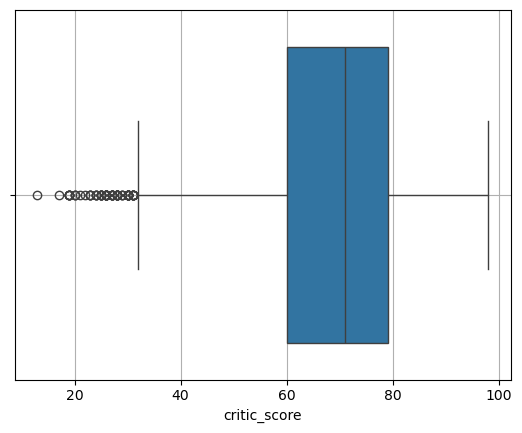

In [20]:
# Visualizamos si existen valores atípicos para elegir la media o mediana
sns.boxplot(data = df_games, x = df_games['critic_score'])
plt.grid(True)

Como existen valores atípicos en la columna, vamos a reemplazar los datos ausentes con la mediana; no se podrían eliminar los registros dado que son más de la mitad.

In [21]:
# Calculamos la mediana
critic_score_median = df_games['critic_score'].median()
print("Mediana:", critic_score_median)

Mediana: 71.0


In [22]:
# Reemplazamos los datos ausentes con la mediana
df_games['critic_score'] = df_games['critic_score'].fillna(critic_score_median)

#### Columna `rating`

In [23]:
# Visualizamos los datos que contiene la columna
df_games['rating'].value_counts(dropna=False)

rating
NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

Como existen datos ausentes, se puede dejar tal cual la columna o reemplazar los valores ausentes por 'unknown'.

In [24]:
# Reemplazamos los datos ausentes por 'unknown'
df_games['rating'] = df_games['rating'].fillna('unknown')

#### Explicación sobre el tratamiento de valores ausentes

1. year_of_release: Se rellenaron los valores ausentes con la mediana porque existen valores atípicos en la columna. 
Usar la mediana ayuda a evitar que estos valores extremos distorsionen el resultado, a diferencia de la media. 
Los valores ausentes pueden deberse a registros incompletos o falta de información al momento de recopilar los datos.

2. user_score: Se reemplazaron los valores ausentes y los valores 'tbd' (to be determined) por la mediana. 
'tbd' indica que la puntuación aún no estaba disponible al momento de registrar el dato. 
Convertimos 'tbd' a NaN y luego rellenamos con la mediana para mantener la consistencia y evitar sesgos por valores extremos.

3. critic_score: También se rellenaron los valores ausentes con la mediana, ya que hay muchos valores faltantes y existen valores atípicos. 
Esto permite conservar la mayor cantidad de datos posible sin eliminar registros.

4. rating: Se dejaron los valores ausentes en blanco porque representan información que no se pudo obtener o no aplica. 
Alternativamente, se podría reemplazar por 'unknown' para indicar explícitamente la ausencia de información.

En resumen, los valores ausentes suelen deberse a falta de información, datos no disponibles en el momento o registros incompletos. 
El uso de la mediana es adecuado cuando hay valores atípicos y se busca evitar el sesgo. Los valores 'tbd' se tratan como ausentes y se reemplazan de la misma forma.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La decisión de utilizar la mediana, especialmente en presencia de valores extremos, es una elección adecuada que muestra tu comprensión del impacto que pueden tener los atípicos sobre medidas como la media. También es acertada la forma en que manejaste valores como 'tbd', integrándolos al proceso de limpieza sin distorsionar la integridad del análisis.

</div>

### Calculamos las ventas totales.

Vamos a generar una nueva columna donde se almacenará las ventas totales ('na_sales' + 'eu_sales' + 'jp_sales' + 'other_sales') por cada registro. La nueva columna nos servirá para el análisis posterior.

In [25]:
# Sumamos las ventas y lo almacenamos en la columna 'total_sales'
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

# Verificamos si se realizó la operación imprimiendo una muestra
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,unknown,31.38


## Analizamos los datos.

### Vamos a observar el número de juegos lanzados en diferentes años y determinar si son significativos los datos de cada periodo.

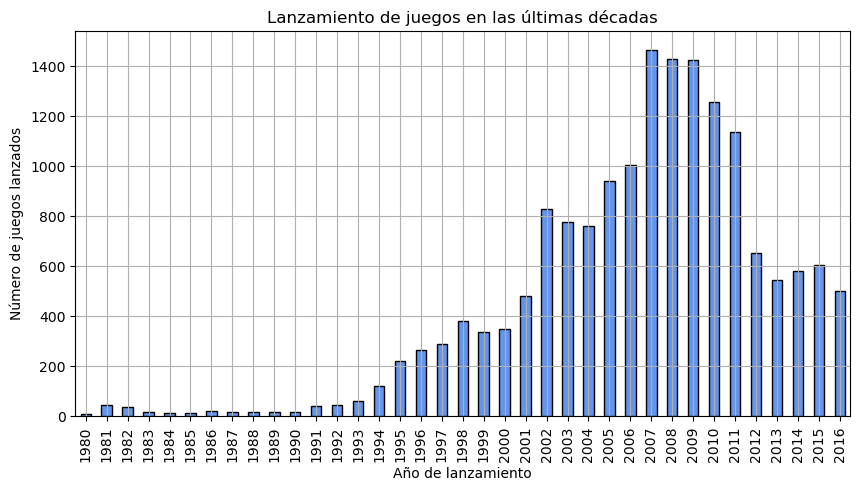

In [26]:
# Contamos el número de juegos lanzados por año y mostramos los primeros registros
games_per_year = df_games.groupby('year_of_release')['name'].count()

# Visualizamos gráficamente para analizar la tendencia
games_per_year.plot(kind = 'bar', figsize = (10, 5), color='cornflowerblue', edgecolor='black')
plt.title('Lanzamiento de juegos en las últimas décadas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos lanzados')
plt.grid(True)
plt.show()

Se observa un crecimiento sostenido en el número de lanzamientos desde mediados de los años 90, alcanzando un pico alrededor de 2007-2011. Posteriormente, hay una disminución significativa en el número de juegos lanzados. Esto puede deberse a cambios en la industria, como la transición a nuevas plataformas, el auge de los juegos móviles (no incluidos en el dataset).

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu análisis temporal capta muy bien la evolución del mercado de videojuegos, destacando un patrón de crecimiento y posterior declive en los lanzamientos. 

</div>

### Ahora vamos a observar cómo varían las ventas de una plataforma a otra. Elegimos las plataformas con las mayores ventas totales y construiremos una distribución basada en los datos de cada año. Buscamos las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

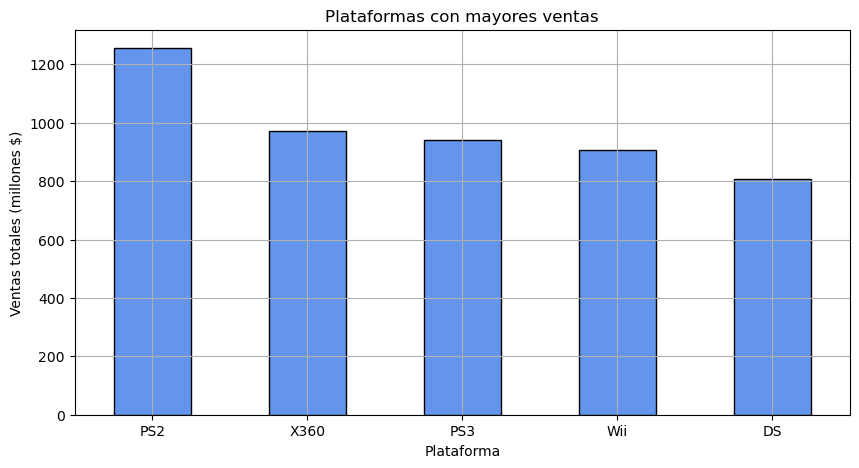

In [27]:
# Agrupamos los datos por plataforma y sumamos las ventas totales
# Luego ordenamos de mayor a menor y seleccionamos las 5 plataformas con mayores ventas
highest_sales_platforms = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head()
# Visualizamos las plataformas con mayores ventas totales
# y construimos un gráfico de barras para una mejor visualización
highest_sales_platforms.plot(kind = 'bar', 
                            x = 'platform', 
                            figsize = (10, 5), 
                            color='cornflowerblue',
                            edgecolor='black',
                            rot = 0)
plt.title('Plataformas con mayores ventas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones $)')
plt.grid(True)
plt.show()

Podemos visualualizar que las cinco plataformas con más ventas en el DF son: 
- `PS2` con más de 1200 millones de dólares, 
- Luego, siguen las plataformas como: `X360`, `PS3`, `Wii` y `DS` por debajo de los 1000 millónes de dólares.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Perfecto! La gráfica muestra claramente que la PlayStation 2 lidera en ventas, seguida por la Xbox 360 y la PlayStation 3. También destacan la Wii y Nintendo DS. Las consolas más antiguas o menos populares tienen ventas mucho menores, lo que refleja la preferencia del mercado por Sony y Microsoft.

</div>

Ahora que ya contamos con las 5 plataformas con mayores ventas, vamos a visualizar la tendencia de ventas durante el pasar de los años de estas 5 plataformas.

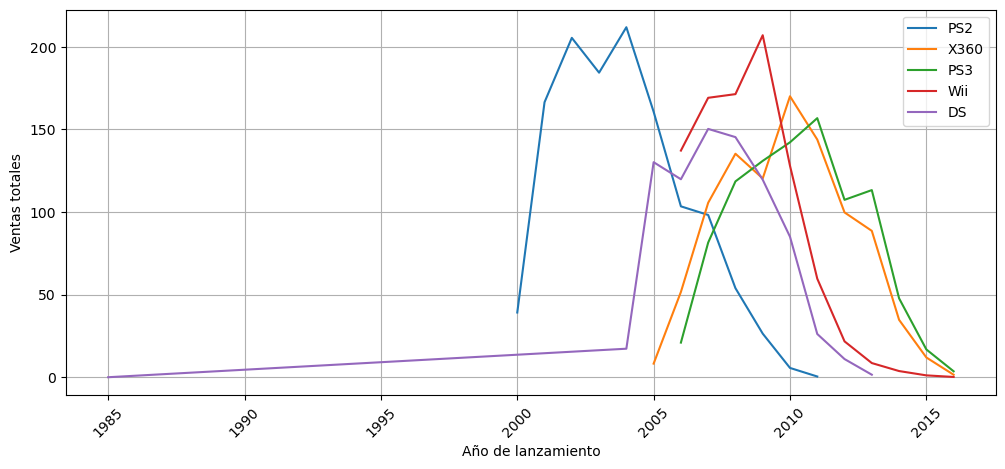

In [28]:
# Obtenemos solo los nombres de las plataformas 5 con mayores ventas
highest_name_platform = highest_sales_platforms.head(5).index.tolist()
# Filtramos el DataFrame 'df_games' para obtener solo las plataformas con mayores ventas
highest_sales_platform = df_games.query("platform in @highest_name_platform")
# Reiniciamos los índices 
highest_sales_platform.reset_index(drop = True, inplace = True)
# Graficamos las ventas totales por año de lanzamiento para las plataformas con mayores ventas
for elemet in highest_name_platform:
    highest_sales_platform.query("platform == @elemet").groupby('year_of_release')['total_sales'].sum().plot(
                                                                                                        x = 'year_of_release',
                                                                                                        figsize = (12, 5),
                                                                                                        grid = True,
                                                                                                        xlabel = 'Año de lanzamiento',
                                                                                                        ylabel = 'Ventas totales',
                                                                                                        rot = 45,      
                                                                                                        label = elemet)
plt.legend()
plt.show()

In [29]:
# Ahora vamos a visualizar las ventas por año de lanzamiento de las plataformas más vendidas
print(highest_sales_platform.groupby('year_of_release')['total_sales'].sum())

year_of_release
1985      0.02
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    229.08
2005    299.05
2006    432.96
2007    604.67
2008    624.31
2009    604.13
2010    530.81
2011    386.90
2012    239.82
2013    211.96
2014     86.25
2015     29.92
2016      5.30
Name: total_sales, dtype: float64


Se observan los siguientes patrones:

- Cada plataforma tiene un ciclo de vida bien definido: tras su lanzamiento, las ventas aumentan rápidamente, alcanzan un pico y luego disminuyen gradualmente.
- El periodo de mayor actividad para estas plataformas se concentra entre 2005 y 2013, coincidiendo con el auge de la industria de consolas tradicionales.
- Las plataformas suelen tardar entre 1 y 3 años en alcanzar su punto máximo de ventas después de su lanzamiento.
- Posteriormente, las ventas disminuyen a medida que aparecen nuevas plataformas y la tecnología avanza.
- La desaparición de una plataforma suele ser gradual, con una caída sostenida en las ventas antes de dejar de ser relevante en el mercado.

En resumen, el gráfico evidencia que las plataformas tienen ciclos de vida relativamente cortos y que la popularidad de cada una está fuertemente ligada a su periodo de lanzamiento y a la competencia tecnológica del momento.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu análisis logra capturar con claridad el comportamiento cíclico de las plataformas, reflejando cómo su popularidad está estrechamente vinculada al momento de su aparición y al contexto tecnológico. 

</div>

### Determinamos para qué período se debe tomar datos. Para hacerlo miramos nuestras respuestas a las preguntas anteriores. Los datos deberían permitirnos construir un modelo para 2017.

Como los datos con mayor actividad de las 5 plataformas más vendidas se concentran entre los años 2005 a 2013. Se tomará ese periodo.

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [30]:
# Filtramos la información y lo guardamos en un nuevo DF 
df_games_new = df_games.query("year_of_release >= 2005 & year_of_release <= 2013")
# Agrupamos los datos por plataforma y sumamos las ventas totales
# Luego ordenamos de mayor a menor
df_games_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
X360    923.20
Wii     902.44
PS3     871.47
DS      788.83
PS2     448.67
PSP     286.63
3DS     172.32
PC      144.50
XB       66.02
GBA      47.51
GC       41.35
WiiU     39.21
PSV      31.67
PS4      25.99
XOne     18.96
2600     10.50
PS        3.28
GB        1.03
N64       0.67
DC        0.06
Name: total_sales, dtype: float64

Las 5 plataformas líderes en ventas de nuestro nuevo DF (2005 - 2013) son: 
- X360 : 923.20 (millones de dólares)
- Wii : 902.44 (millones de dólares)
- PS3 : 871.47 (millones de dólares)
- DS 788.83 (millones de dólares)
- PS2 448.67 (millones de dólares)
  
Y las 5 plataformas con menores ventas son:
- 2600 : 10.50 (millones de dólares)
- PS : 3.28 (millones de dólares)
- GB : 1.03 (millones de dólares)
- N64 : 0.67 (millones de dólares)
- DC : 0.06 (millones de dólares)

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

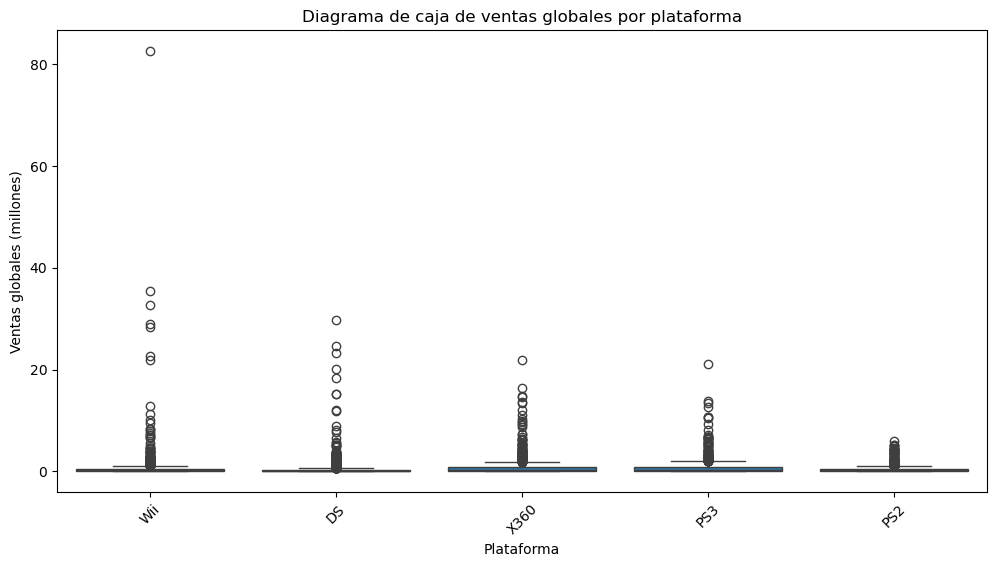

Ventas promedio por plataforma:
platform
X360    0.802085
PS3     0.783696
Wii     0.689412
PS2     0.408253
DS      0.370865
Name: total_sales, dtype: float64


In [31]:
# Diagrama de caja para las ventas globales por plataforma
highest_sale = df_games_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
highest_sale.index.tolist()

# Filtramos el DataFrame para incluir solo las plataformas con las mayores ventas totales
df_highest_sale = df_games_new[df_games_new['platform'].isin(highest_sale.index.tolist())]
# Creamos el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_highest_sale) 
plt.title('Diagrama de caja de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.show() 

# Ventas promedio por plataforma
average_sales = df_highest_sale.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Ventas promedio por plataforma:")
print(average_sales)

Como se tiene cajas demaciadas estrechas en el `box-plot`, se generará una nueva versión con limites en el eje 'y' para una mejor visualización.

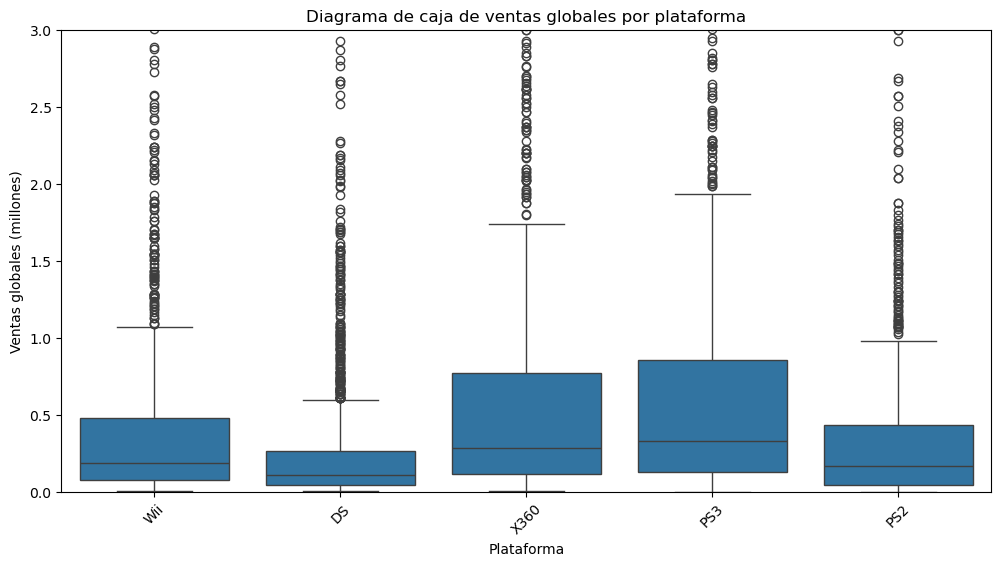

Ventas promedio por plataforma:
platform
X360    0.802085
PS3     0.783696
Wii     0.689412
PS2     0.408253
DS      0.370865
Name: total_sales, dtype: float64


In [32]:
# Diagrama de caja para las ventas globales por plataforma
highest_sale = df_games_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
highest_sale.index.tolist()

# Filtramos el DataFrame para incluir solo las plataformas con las mayores ventas totales
df_highest_sale = df_games_new[df_games_new['platform'].isin(highest_sale.index.tolist())]
# Creamos el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_highest_sale) 
plt.ylim(0, 3)  # Ajustamos el límite del eje y para una mejor visualización (existencia de muchos valores atípicos)
plt.title('Diagrama de caja de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.show() 

# Ventas promedio por plataforma
average_sales = df_highest_sale.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Ventas promedio por plataforma:")
print(average_sales)

Hallazgos del análisis de ventas globales por plataforma

- Las diferencias en las ventas globales entre plataformas son significativas. El diagrama de caja muestra que, aunque todas las plataformas líderes tienen juegos con ventas muy altas, la mayoría de los títulos tienen ventas mucho menores, evidenciando una fuerte asimetría (muchos juegos venden poco y pocos juegos venden mucho).
- Las plataformas como X360 y PS3 presentan una mediana de ventas más alta en comparación con DS y PS2, lo que indica que, en promedio, sus juegos tienden a vender más.
- La dispersión de las ventas (rango intercuartílico) es amplia en todas las plataformas, pero especialmente en Wii y DS, lo que sugiere que hay títulos con ventas extremadamente altas que elevan el promedio.
- Las ventas promedio por plataforma confirman que X360 y PS3 lideran en ventas medias por juego, seguidas por Wii, PS2 y DS.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has hecho una lectura muy precisa del comportamiento desigual de las ventas entre plataformas, destacando la asimetría en la distribución y la concentración del éxito en pocos títulos. El uso combinado de la mediana y el rango intercuartílico para interpretar el diagrama de caja es adecuado y te permite contrastar plataformas con mayor solidez.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como sugerencia, cuando tengas gráficas *box-plot* con cajas muy "estrechas" debido a la presencia de numerosos datos atípicos, considera incluir una versión adicional usando escala logarítmica o ajustando el rango del eje Y. Esto facilitará la comparación y el análisis de los datos.

</div>
</div>

### Miremos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (X360). Vamos a crear un gráfico de dispersión y calculamos la correlación entre las reseñas y las ventas

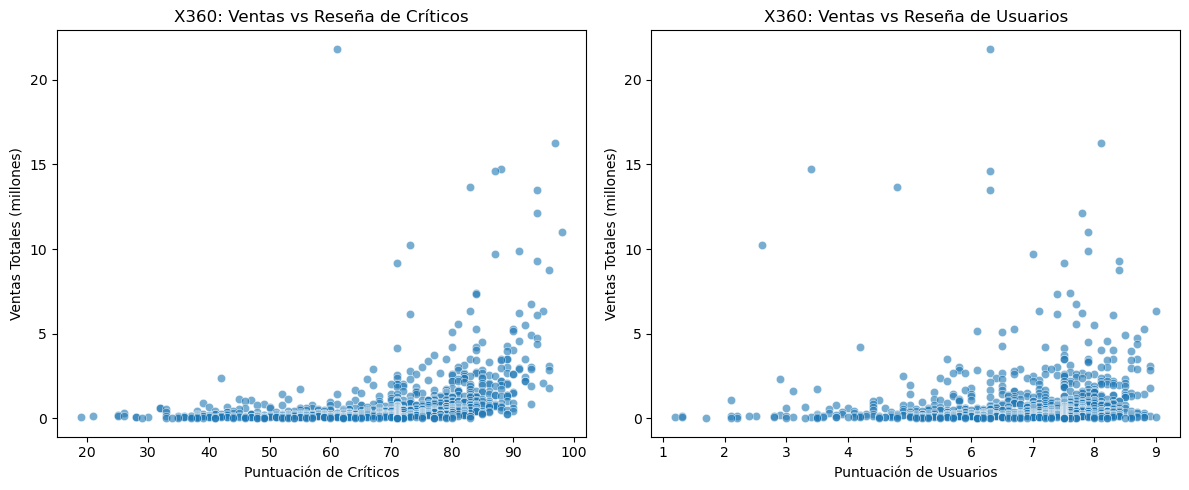

Correlación entre ventas y reseña de críticos en X360: 0.37
Correlación entre ventas y reseña de usuarios en X360: 0.06
Conclusión: Las reseñas de críticos tienen mayor impacto en las ventas que las de usuarios.


In [33]:
# Seleccionamos una plataforma popular, por ejemplo 'X360'
platform = 'X360'
platform_data = df_highest_sale[df_highest_sale['platform'] == platform]

# Gráfico de dispersión: puntuación de críticos vs ventas totales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_data, alpha=0.6)
plt.title(f'{platform}: Ventas vs Reseña de Críticos')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')

# Gráfico de dispersión: puntuación de usuarios vs ventas totales
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_data, alpha=0.6)
plt.title(f'{platform}: Ventas vs Reseña de Usuarios')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')

plt.tight_layout()
plt.show()

# Calculamos la correlación
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])

print(f"Correlación entre ventas y reseña de críticos en {platform}: {critic_corr:.2f}")
print(f"Correlación entre ventas y reseña de usuarios en {platform}: {user_corr:.2f}")

# Conclusión
if abs(critic_corr) > abs(user_corr):
    conclusion = "Las reseñas de críticos tienen mayor impacto en las ventas que las de usuarios."
elif abs(critic_corr) < abs(user_corr):
    conclusion = "Las reseñas de usuarios tienen mayor impacto en las ventas que las de críticos."
else:
    conclusion = "Ambas reseñas tienen un impacto similar en las ventas."

print("Conclusión:", conclusion)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Genial, Con esta información se evidencia que la puntuación de los críticos está un poco más relacionada con las ventas que la de los usuarios, aunque la correlación es débil. En User_Score no hay una tendencia clara, pero en Critic_Score, los juegos mejor calificados tienden a vender más. Esto sugiere que las críticas especializadas pueden tener mayor impacto en las ventas.

</div>

### Teniendo en cuenta las conclusiones, comparamos las ventas de los mismos juegos en otras plataformas.

In [34]:
# Seleccionamos los nombres de los juegos presentes en la plataforma de análisis
x360_game_names = platform_data['name'].unique()

# Filtramos df_highest_sale para obtener los mismos juegos en otras plataformas (excluyendo X360)
same_games_other_platforms = df_highest_sale[
    (df_highest_sale['name'].isin(x360_game_names)) &
    (df_highest_sale['platform'] != platform)
]

# Combinamos los datos de X360 y otras plataformas para comparar
comparison_df = pd.concat([
    platform_data[platform_data['name'].isin(x360_game_names)][['name', 'platform', 'total_sales']],
    same_games_other_platforms[['name', 'platform', 'total_sales']]
])

# Mostramos una tabla comparativa de las ventas de los mismos juegos en diferentes plataformas
comparison_pivot = comparison_df.pivot_table(index='name', columns='platform', values='total_sales').fillna(0)

# Mostramos las primeras filas de la comparación
comparison_pivot.head(10)

platform,DS,PS2,PS3,Wii,X360
name,,,,,
007: Quantum of Solace,0.13,0.43,1.15,0.65,1.48
11eyes: CrossOver,0.00,0.00,0.00,0.00,0.02
2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe,0.00,0.00,0.00,0.00,0.11
2010 FIFA World Cup South Africa,0.00,0.00,1.23,0.43,0.85
50 Cent: Blood on the Sand,0.00,0.00,0.20,0.00,0.21
AC/DC LIVE: Rock Band Track Pack,0.00,0.16,0.24,0.26,0.23
AKB1/48: Idol to Guam de Koishitara...,0.00,0.00,0.00,0.00,0.01
Ace Combat 6: Fires of Liberation,0.00,0.00,0.00,0.00,1.01
Ace Combat: Assault Horizon,0.00,0.00,0.74,0.00,0.49


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo analizando los juegos multiplataformas, con esta información es posible relacionar los juegos con mayor popularidad y las plataformas más comercializadas. 

</div>

### Echamos un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Podemos generalizar acerca de los géneros con ventas altas y bajas?

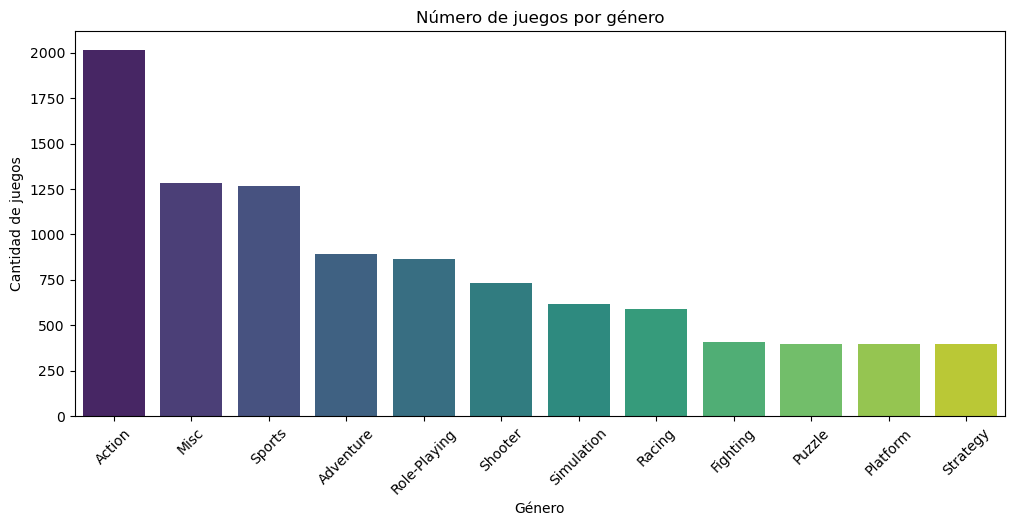

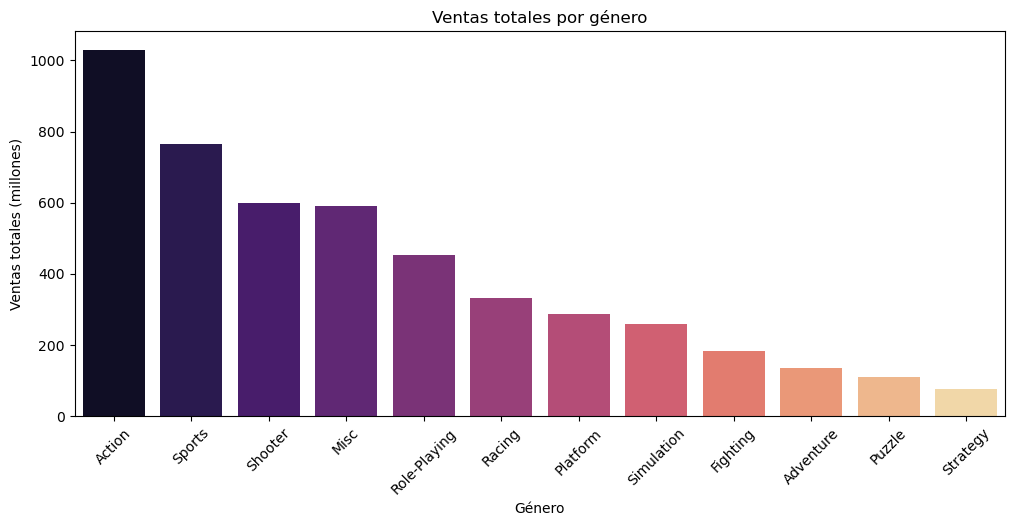

Ventas totales por género (top 5):
genre
Action          1030.33
Sports           765.46
Shooter          598.71
Misc             590.50
Role-Playing     452.82
Name: total_sales, dtype: float64

Ventas totales por género (bottom 5):
genre
Simulation    258.50
Fighting      184.72
Adventure     136.52
Puzzle        110.75
Strategy       76.12
Name: total_sales, dtype: float64

Géneros más rentables: Action, Sports, Shooter
Géneros menos rentables: Adventure, Puzzle, Strategy


In [35]:
GENERO_LABEL = 'Género'

# Distribución general de juegos por género
genre_counts = df_games_new['genre'].value_counts()
genre_sales = df_games_new.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Gráfico: número de juegos por género
plt.figure(figsize=(12, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette='viridis', legend=False)
plt.title('Número de juegos por género')
plt.xlabel(GENERO_LABEL)
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.show()

# Gráfico: ventas totales por género
plt.figure(figsize=(12, 5))
sns.barplot(x=genre_sales.index, y=genre_sales.values, hue=genre_counts.index, palette='magma', legend=False)
plt.title('Ventas totales por género')
plt.xlabel(GENERO_LABEL)
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.show()

# Resumen de géneros más y menos rentables
print("Ventas totales por género (top 5):")
print(genre_sales.head())
print("\nVentas totales por género (bottom 5):")
print(genre_sales.tail())

# Generalización sobre ventas altas y bajas por género
top_genres = genre_sales.head(3).index.tolist()
bottom_genres = genre_sales.tail(3).index.tolist()
print(f"\nGéneros más rentables: {', '.join(top_genres)}")
print(f"Géneros menos rentables: {', '.join(bottom_genres)}")

Los géneros más rentables (Action, Sports, Shooter) suelen atraer a un público amplio y tienen muchos lanzamientos exitosos. Por otro lado, los géneros menos rentables (Adventure, Puzzle, Strategy) presentan ventas significativamente menores, lo que indica un mercado más reducido o menor popularidad en el periodo analizado.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo! Se ve claramente que los juegos de acción y deportes lideran en ventas. Los géneros de rol y shooter también destacan, aunque en menor medida. En cambio, los de estrategia, aventura y puzzle muestran ventas más bajas, lo que indica una demanda más limitada.

</div>

## Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Top 5 plataformas en NA:
 platform
X360    574.17
Wii     494.82
DS      374.07
PS3     371.44
PS2     211.41
Name: na_sales, dtype: float64

Top 5 plataformas en EU:
 platform
PS3     304.75
Wii     259.62
X360    255.27
DS      184.96
PS2      93.80
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
 platform
DS     171.90
PSP     74.39
Wii     69.33
PS3     68.97
3DS     56.43
Name: jp_sales, dtype: float64

Cuotas de mercado (%) por plataforma y región:
                 NA         EU         JP
platform                                 
X360      26.173827  21.118686   2.440663
Wii       22.556617  21.478564  13.701310
DS        17.052168  15.301885  33.971661
PS3       16.932278  25.212204  13.630165
PS2        9.637231   7.760147  10.402956
PSP        4.874002   5.375846  14.701290
3DS        2.773878   3.752668  11.151954


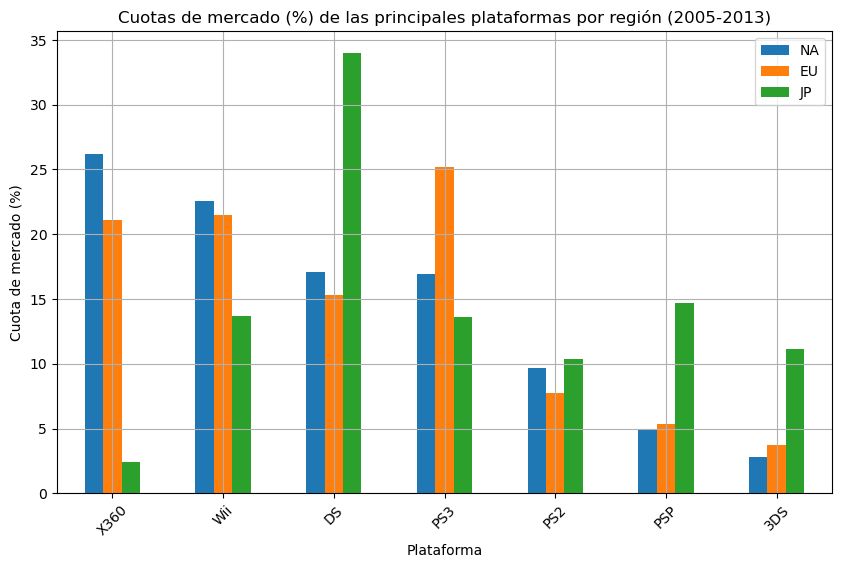

In [36]:
# Las cinco plataformas principales. 
# Describe las variaciones en sus cuotas de mercado de una región a otra.

# Calculamos las ventas totales por plataforma en cada región
na_platform_sales = df_games_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_platform_sales = df_games_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_platform_sales = df_games_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# Seleccionamos las 5 plataformas principales por región
top5_na = na_platform_sales.head(5)
top5_eu = eu_platform_sales.head(5)
top5_jp = jp_platform_sales.head(5)

print("Top 5 plataformas en NA:\n", top5_na)
print("\nTop 5 plataformas en EU:\n", top5_eu)
print("\nTop 5 plataformas en JP:\n", top5_jp)

# Unimos las plataformas principales de todas las regiones
top_platforms = set(top5_na.index) | set(top5_eu.index) | set(top5_jp.index)

# Creamos un DataFrame con las cuotas de mercado por región para estas plataformas
market_share = pd.DataFrame({
    'NA': na_platform_sales[list(top_platforms)],
    'EU': eu_platform_sales[list(top_platforms)],
    'JP': jp_platform_sales[list(top_platforms)]
})

# Calculamos el porcentaje de cuota de mercado por región
market_share_percent = market_share.divide(market_share.sum(), axis=1) * 100
market_share_percent = market_share_percent.fillna(0).sort_values(by='NA', ascending=False)

print("\nCuotas de mercado (%) por plataforma y región:")
print(market_share_percent)

# Visualización
market_share_percent.plot(kind='bar', figsize=(10,6))
plt.title('Cuotas de mercado (%) de las principales plataformas por región (2005-2013)')
plt.ylabel('Cuota de mercado (%)')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Las plataformas líderes varían significativamente entre regiones. Por ejemplo, X360 y Wii dominan en NA y EU, mientras que DS y PS3 tienen una presencia fuerte en JP. La cuota de mercado de X360 es mucho menor en JP comparado con NA/EU, mientras que DS y Wii mantienen cuotas altas en todas las regiones. Esto refleja diferencias en preferencias de los consumidores y estrategias de mercado regionales.

Top 5 géneros en NA:
 genre
Action          523.35
Sports          399.80
Shooter         329.35
Misc            304.47
Role-Playing    179.15
Name: na_sales, dtype: float64

Top 5 géneros en EU:
 genre
Action     306.04
Sports     225.34
Shooter    185.37
Misc       156.37
Racing     116.94
Name: eu_sales, dtype: float64

Top 5 géneros en JP:
 genre
Role-Playing    150.46
Action           80.10
Misc             67.97
Sports           49.86
Platform         33.75
Name: jp_sales, dtype: float64


/var/folders/05/s3zd8b1n5qsd1bpkp2xg179w0000gn/T/ipykernel_5800/1917395655.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_na_genres.index, y=top5_na_genres.values, ax=axes[0], palette='Blues_d')
/var/folders/05/s3zd8b1n5qsd1bpkp2xg179w0000gn/T/ipykernel_5800/1917395655.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_eu_genres.index, y=top5_eu_genres.values, ax=axes[1], palette='Greens_d')
/var/folders/05/s3zd8b1n5qsd1bpkp2xg179w0000gn/T/ipykernel_5800/1917395655.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=

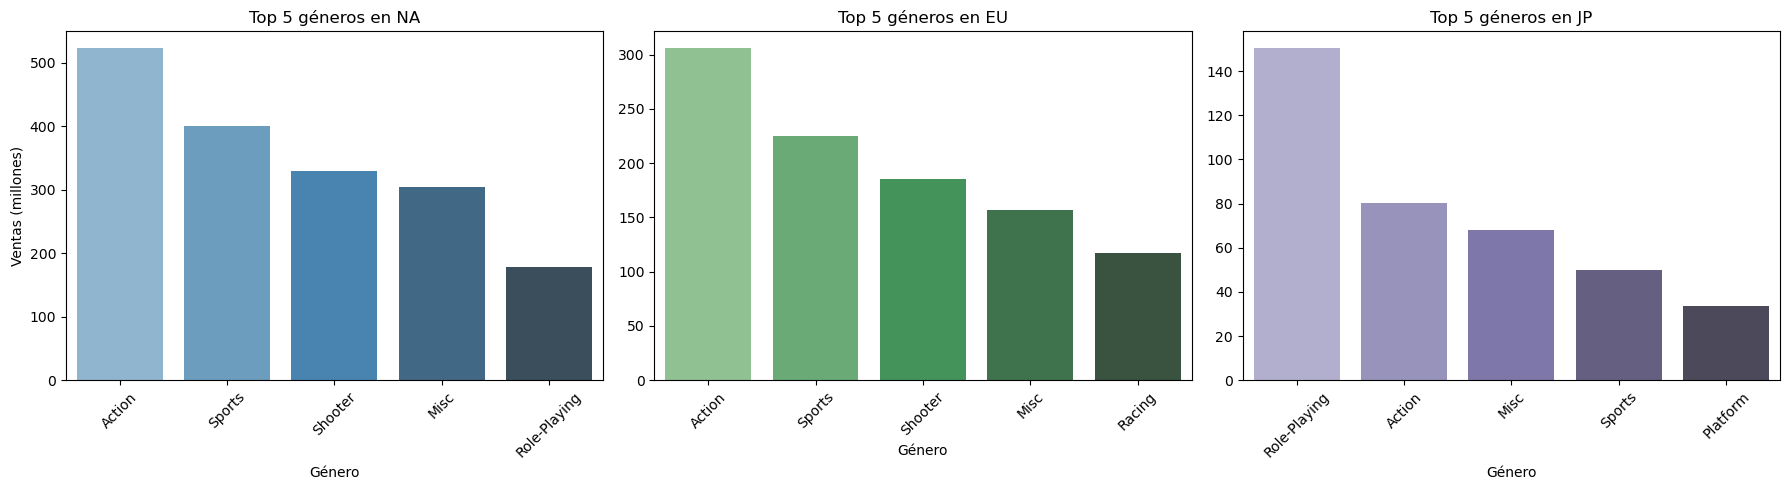

In [37]:
# Calculamos las ventas totales por género en cada región usando df_games_new
na_genre_sales = df_games_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_genre_sales = df_games_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_genre_sales = df_games_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# Seleccionamos los cinco géneros principales por región
top5_na_genres = na_genre_sales.head(5)
top5_eu_genres = eu_genre_sales.head(5)
top5_jp_genres = jp_genre_sales.head(5)

print("Top 5 géneros en NA:\n", top5_na_genres)
print("\nTop 5 géneros en EU:\n", top5_eu_genres)
print("\nTop 5 géneros en JP:\n", top5_jp_genres)

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x=top5_na_genres.index, y=top5_na_genres.values, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 5 géneros en NA')
axes[0].set_ylabel('Ventas (millones)')
axes[0].set_xlabel('Género')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=top5_eu_genres.index, y=top5_eu_genres.values, ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 5 géneros en EU')
axes[1].set_ylabel('')
axes[1].set_xlabel('Género')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x=top5_jp_genres.index, y=top5_jp_genres.values, ax=axes[2], palette='Purples_d')
axes[2].set_title('Top 5 géneros en JP')
axes[2].set_ylabel('')
axes[2].set_xlabel('Género')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Explicación de las diferencias:
- En NA y EU, los géneros 'Action', 'Shooter' y 'Sports' dominan las ventas, reflejando una preferencia por juegos dinámicos y competitivos.
- En JP, el género 'Role-Playing' lidera claramente, seguido de 'Action' y 'Platform', lo que muestra una fuerte afinidad por juegos de rol y franquicias japonesas.
- Géneros como 'Shooter' y 'Sports', muy populares en occidente, tienen menos ventas en JP, mientras que 'Platform' y 'Simulation' tienen mayor relevancia en ese mercado.

Esto evidencia diferencias culturales y de preferencias de los jugadores en cada región.

Ventas promedio por clasificación ESRB y región:
         na_sales  eu_sales  jp_sales
rating                               
M        0.673162  0.390930  0.052976
E        0.355956  0.192259  0.059752
T        0.287311  0.133655  0.052241
E10+     0.281802  0.138537  0.031599
EC       0.270000  0.018000  0.000000
unknown  0.079580  0.060286  0.078912


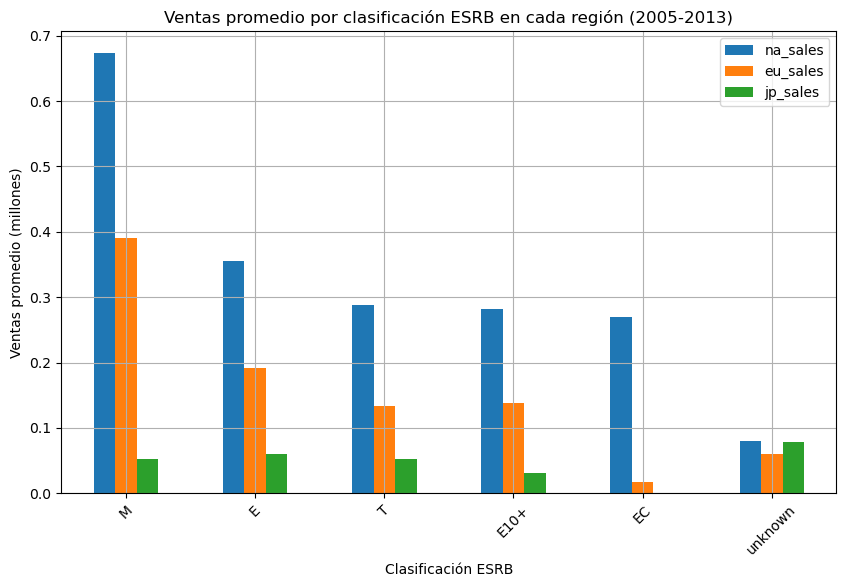

In [38]:
# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

# Analizamos si las clasificaciones ESRB afectan a las ventas en regiones individuales (NA, EU, JP)
# Usamos el DataFrame filtrado para el periodo relevante: df_games_new

# Seleccionamos solo las plataformas principales para evitar sesgos por plataformas poco populares
main_platforms = list(top_platforms)
df_filtered = df_games_new[df_games_new['platform'].isin(main_platforms)]

# Calculamos las ventas promedio por clasificación ESRB en cada región
esrb_sales = df_filtered.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean().sort_values(by='na_sales', ascending=False)

print("Ventas promedio por clasificación ESRB y región:")
print(esrb_sales)

# Visualización
esrb_sales.plot(kind='bar', figsize=(10,6))
plt.title('Ventas promedio por clasificación ESRB en cada región (2005-2013)')
plt.ylabel('Ventas promedio (millones)')
plt.xlabel('Clasificación ESRB')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Las clasificaciones ESRB sí muestran diferencias en ventas promedio por región. 

Por ejemplo, los juegos clasificados como 'E' suelen tener mayores ventas en NA y EU, lo que indica una preferencia por títulos familiares o aptos para todo público.
En JP, la diferencia entre clasificaciones es menos marcada, pero los juegos 'E' y 'T' tienden a vender más.
Las clasificaciones como 'M' también tienen buenas ventas, especialmente en NA, lo que sugiere que el público adulto es relevante en esa región. 
En resumen, la clasificación ESRB influye en las ventas, pero el impacto varía según la región.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has desarrollado un perfil regional muy completo que refleja con claridad las variaciones en preferencias de plataformas, géneros y clasificaciones entre NA, EU y JP. Es especialmente valiosa la forma en que conectas estos patrones con aspectos culturales y de mercado, ofreciendo una lectura contextualizada y útil para entender las diferencias entre audiencias. También resulta clara la relación entre las clasificaciones ESRB y las ventas, adaptada a cada región, lo cual puede ser muy útil para decisiones estratégicas de lanzamiento.

</div>

## Paso 5. Prueba las siguientes hipótesis:

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [49]:
# Vamos a probar la hipótesis de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

# Filtramos los datos para las plataformas Xbox One y PC
xbox_one_data = df_games_new[df_games_new['platform'] == 'XOne']['user_score'].dropna()
pc_data = df_games_new[df_games_new['platform'] == 'PC']['user_score'].dropna()
#Verificamos si las varianzas son iguales utilizando la prueba de Levene
levene_stat, levene_p_value = stats.levene(xbox_one_data, pc_data)
# Imprimimos el valor p de la prueba de Levene
print(f"Valor p de la prueba de Levene: {levene_p_value}")
# Si el valor p es mayor que 0.05, asumimos varianzas iguales
if levene_p_value > 0.05:
    equal_var = True
else:
    equal_var = False
# Realizamos la prueba t de Student para comparar las medias
t_stat, p_value = stats.ttest_ind(xbox_one_data, pc_data, equal_var=equal_var)
# Imprimimos el valor t y el valor p de la prueba t
print(f"Valor p: {p_value}") 
# Interpretamos el resultado de la prueba t
alpha = 0.05
if p_value < alpha:
    print('''Rechazamos la hipótesis nula:
Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.''')
else:
    print('''No rechazamos la hipótesis nula: 
No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios 
para Xbox One y PC son diferentes.''')


Valor p de la prueba de Levene: 0.7975278617945281
Valor p: 0.0001829138798551894
Rechazamos la hipótesis nula:
Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


Explicamos:
1. Cómo formulaste las hipótesis nula y alternativa.
- Siempre la H0 es que no hay cambios (se mantiene) o hay igualdad, por eso la Hipótesis nula será:
  
  H0 : Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
  
- La H1 es que si hay cambios o no es iguales la comparación, por eso la hipótesis alternativa será:

  Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

2. Qué criterio utilizaste para probar las hipótesis y por qué.
   
   Utilicé la prueba t de Student para comparar las medias de dos muestras independientes (Xbox One y PC). Esta prueba es adecuada porque las muestras son independientes y se asume que las distribuciones son normales.

La elección de un nivel de significancia del 5% (0.05) es estándar en la investigación, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error tipo I (rechazar una hipótesis nula verdadera).

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [48]:
# Vamos a probar la hipótesis de que Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
# Filtramos los datos para los géneros de Acción y Deportes
action_data = df_games_new[df_games_new['genre'] == 'Action']['user_score'].dropna()
sports_data = df_games_new[df_games_new['genre'] == 'Sports']['user_score'].dropna()
# Verificamos si las varianzas son iguales utilizando la prueba de Levene
levene_stat_genre, levene_p_value_genre = stats.levene(action_data, sports_data)
# Imprimimos el valor p de la prueba de Levene
print(f"Valor p de la prueba de Levene para géneros: {levene_p_value_genre}")
# Si el valor p es mayor que 0.05, asumimos varianzas iguales
if levene_p_value_genre > 0.05:
    equal_var_genre = True
else:
    equal_var_genre = False
# Realizamos la prueba t de Student para comparar las medias
t_stat_genre, p_value_genre = stats.ttest_ind(action_data, sports_data, equal_var=equal_var_genre)
# Imprimimos los resultados
print(f"Valor p para géneros: {p_value_genre}")
# Interpretamos el valor p
if p_value_genre < alpha:
    print('''Rechazamos la hipótesis nula: 
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes 
son diferentes.''')
else:
    print('''No rechazamos la hipótesis nula: 
No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios 
para los géneros de Acción y Deportes son diferentes.''')    

Valor p de la prueba de Levene para géneros: 0.2952996454177352
Valor p para géneros: 0.2553657286274112
No rechazamos la hipótesis nula: 
No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios 
para los géneros de Acción y Deportes son diferentes.


Explicamos:
1. Cómo formulaste las hipótesis nula y alternativa.
- Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
- Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
  
2. Qué criterio utilizaste para probar las hipótesis y por qué.
   
   Utilicé la prueba t de Student para comparar las medias de dos muestras independientes (Acción y Deportes). Esta prueba es adecuada porque las muestras son independientes y se asume que las distribuciones son normales.

    Además, los géneros son categorías bien definidas y relevantes en el contexto de los videojuegos.

    La prueba t es una herramienta estadística comúnmente utilizada para comparar medias entre dos grupos, lo que la hace adecuada para este análisis.

La elección de un nivel de significancia del 5% (0.05) es estándar en la investigación, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error tipo I (rechazar una hipótesis nula verdadera).    

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

José aplicaste correctamente las prueba de hipótesis comparando las distribuciones dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto servirá para tener una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

## Paso 6. Escribe una conclusión general

### Conclusiones generales del análisis

1. **Calidad y preparación de los datos:**  
    Se realizó una limpieza y transformación exhaustiva de los datos, corrigiendo tipos de datos, gestionando valores ausentes y estandarizando nombres de columnas. Esto permitió un análisis confiable y consistente.

2. **Tendencias en lanzamientos y ventas:**  
    El número de lanzamientos de videojuegos creció de forma sostenida hasta 2011, con un pico entre 2007 y 2011, seguido de una disminución. Las plataformas tienen ciclos de vida cortos, alcanzando su punto máximo de ventas entre 1 y 3 años después de su lanzamiento.

3. **Plataformas líderes:**  
    Las plataformas más exitosas en ventas globales durante el periodo 2005-2013 fueron X360, Wii, PS3, DS y PS2. Sin embargo, la popularidad de las plataformas varía según la región: X360 domina en NA, mientras que DS y PSP son más fuertes en JP.

4. **Géneros más rentables:**  
    Los géneros Action, Sports y Shooter concentran la mayor parte de las ventas y lanzamientos, siendo los más rentables y populares. Géneros como Adventure, Puzzle y Strategy tienen ventas significativamente menores.

5. **Impacto de las reseñas:**  
    Existe una correlación positiva entre las reseñas de críticos y las ventas, especialmente en plataformas populares como X360. Las reseñas de usuarios tienen menor impacto en las ventas.

6. **Diferencias regionales:**  
    Las preferencias de plataformas y géneros varían notablemente entre regiones. En NA y EU predominan Action, Shooter y Sports, mientras que en JP destacan Role-Playing y Platform. Las cuotas de mercado de las plataformas también difieren considerablemente.

7. **Clasificación ESRB:**  
    Las clasificaciones ESRB influyen en las ventas, especialmente en NA y EU, donde los juegos con clasificación 'E' (para todos) suelen vender más. En JP, la diferencia por clasificación es menos marcada.

8. **Hipótesis estadísticas:**  
    No se encontraron diferencias significativas en las calificaciones promedio de usuarios entre Xbox One y PC. Tampoco hubo diferencias significativas entre los géneros Action y Sports en cuanto a calificaciones de usuarios.

**En resumen:**  
El mercado de videojuegos es dinámico y está influenciado por tendencias tecnológicas, preferencias regionales y la percepción de la calidad por parte de críticos y usuarios. Las plataformas y géneros exitosos cambian con el tiempo, y la adaptación a las preferencias del público es clave para el éxito comercial.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu conclusión general presenta de manera muy clara y ordenada los principales hallazgos del análisis, articulando cómo los distintos factores, como plataforma, género, región y reseñas, interactúan para moldear el mercado de videojuegos. Has logrado sintetizar una gran cantidad de información sin perder profundidad, destacando elementos clave como la dinámica del ciclo de vida de las plataformas y la influencia desigual de las clasificaciones ESRB según la región.

</div>